# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [39]:
# Import libraries and modules.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# IMPORT DATA.
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?


**Answer:** 

Exploratory Data Analysis (EDA) is a critical step before constructing a multiple linear regression model. Key purposes of EDA for MLR include: 

* Understanding Data Structure. Indentigy data types, dependent and independent variables, etc. 

* Detecting Anomalies and Outliers. These can significantly influence the regression coefficients and skew the model's performance.

* Checking Assumptions of Linear Regression: Multiple linear regression assumes linearity, independence, homoscedasticity and normal distribution of residuals. EDA involves visualizing relationships, checking correlation matrices, and plotting residuals. 

* Identifying Relationships between Variables: EDA involves looking for relationships between the predictor variables and the response variable using scatter plots, correlation coefficients, etc.

* Handling Missing Data: Identifying missing data and understanding the pattern of missingness (if any) is crucial. EDA helps in deciding whether to impute missing values, remove missing data points, or use techniques like model-based imputation.

* Preliminary Feature Selection: EDA can guide preliminary feature selection by identifying variables that do not have a significant relationship with the outcome or have high multicollinearity with other independent variables.

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

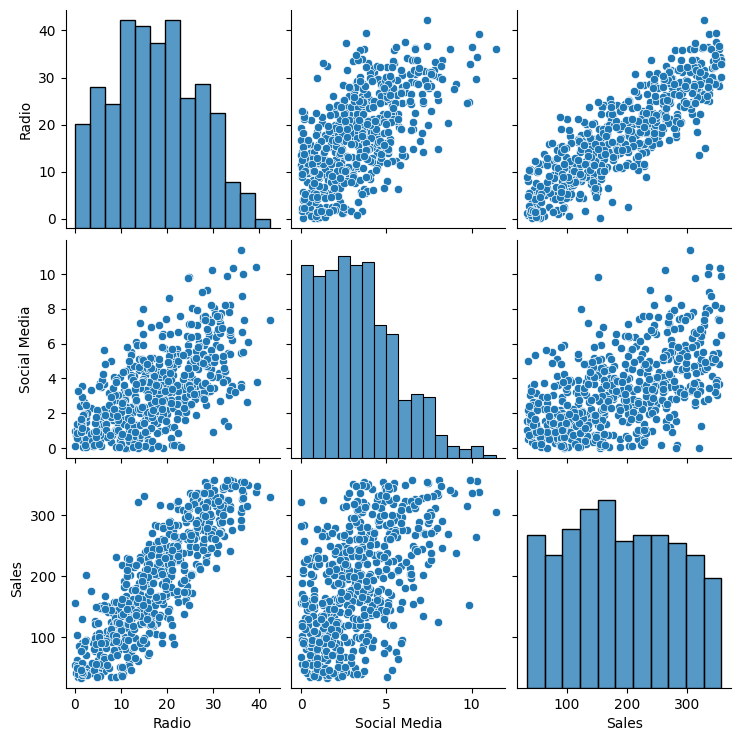

In [8]:
# Create a pairplot of the data.

sns.pairplot(data)
plt.show()


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



**Answer:** Radio and Social Media both seem to have some degree of linear association with Sales. Categorical variables TV and influencer are excluded from the plot. 

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [14]:
# Calculate the mean sales for each TV category. 
print(data.groupby(by='TV')['Sales'].mean().reset_index())
print('')

# Calculate the mean sales for each Influencer category. 
print(data.groupby(by='Influencer')['Sales'].mean().reset_index())


       TV       Sales
0    High  300.853195
1     Low   90.984101
2  Medium  195.358032

  Influencer       Sales
0      Macro  181.670070
1       Mega  194.487941
2      Micro  188.321846
3       Nano  191.874432


**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



**Answer:** From the data, it seems that there is a positive relationship bwetween TV budget and Sales. On the other hand, Influencer status does not seeem to have any effect on Sales. 

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [32]:
# Determine the number of rows where there is at least one null value
print(data[data.isnull().any(axis=1)].sum())
print(data.shape)
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)
print(data.shape)

TV                0
Radio           0.0
Social Media    0.0
Influencer        0
Sales           0.0
dtype: object
(572, 5)
(572, 5)


### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [41]:
# Rename all columns in data that contain a space. 
print(data.columns)

data = data.rename(columns={'Social Media': 'Social_Media'})
print(data.columns)


Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')
Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [44]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model.
OLS = ols(formula=ols_formula, data=data) 

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_summary = model.summary()

# Display the model results.
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.63e-288
Time:                        16:11:23   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** Which independent variables did you choose for the model, and why?



**Answer:**  Two independent variables were chosen for the model, TV and Radio budgets. These variables showed linear correlation with Sales when visualised using pairplot(). 

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

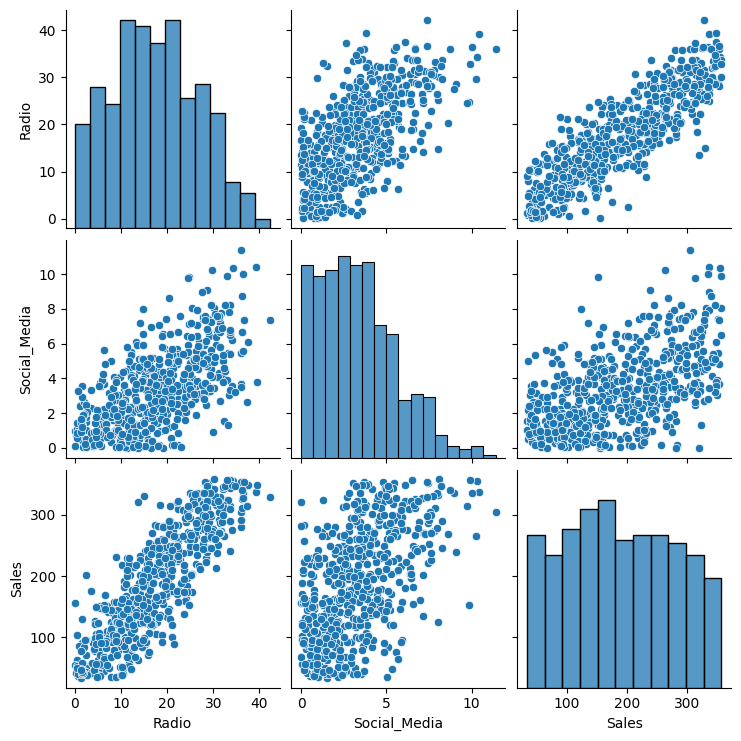

In [46]:
# Create a scatterplot for each independent variable and the dependent variable.
sns.pairplot(data)
plt.show()

**Question:** Is the linearity assumption met?


**Answer:** Linearity was met for Radio. 

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

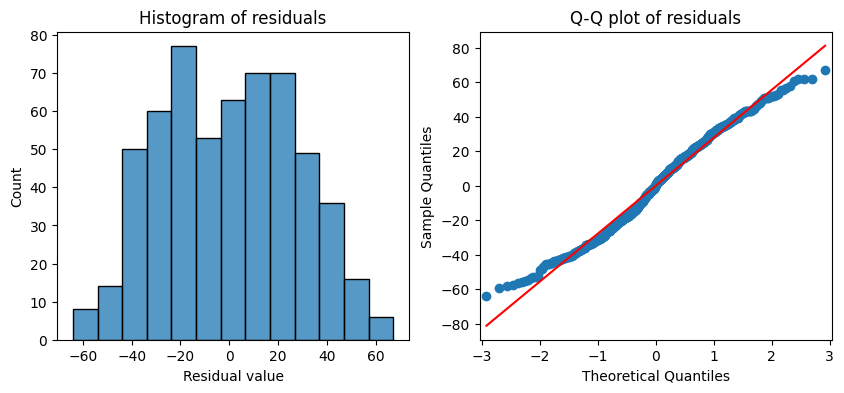

In [56]:
# Calculate the residuals.
residuals = model.resid

# Create a 1 by 2 plot space
fig, axes = plt.subplots(1, 2, figsize = (10,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual value")
axes[0].set_title("Histogram of residuals")


# Create a Q-Q plot of the residuals.
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q plot of residuals')

plt.show()


**Question:** Is the normality assumption met?



**Answer:** The normality assumption has been met. Residuals are approximately normally distributed. 

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

Text(0.5, 1.0, 'Homoscedasticity check')

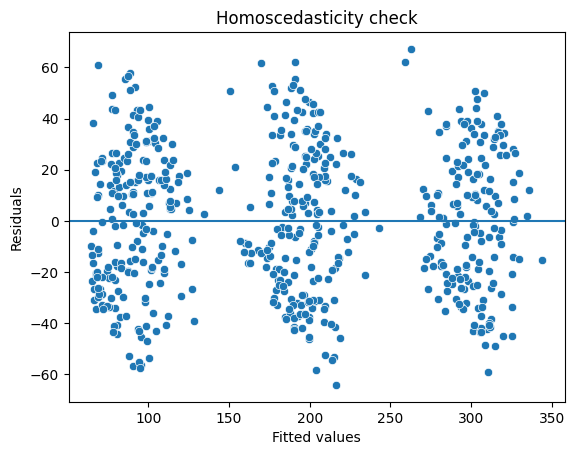

In [63]:
# Create a scatterplot with the fitted values from the model and the residuals.
fitted_values = model.predict(data)
sns.scatterplot(x=fitted_values, y=residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity check")


**Question:** Is the constant variance assumption met?




**Answer:** The fitted values are in three groups because the categorical variable TV has stronger explanatory power in this model, i.e. decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

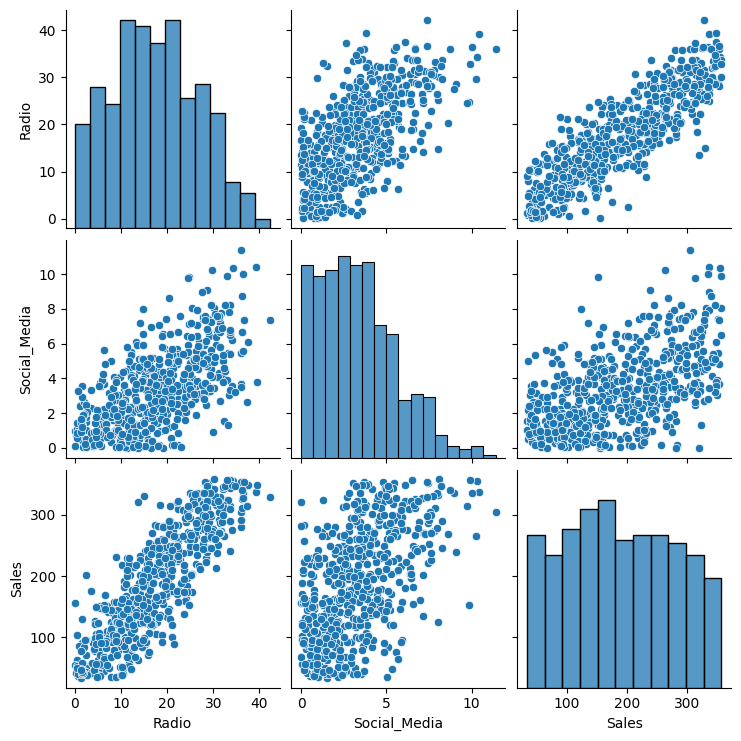

In [64]:
# Create a pairplot of the data.

sns.pairplot(data)
plt.show()


In [73]:
# Calculate the variance inflation factor (optional).

from statsmodels.stats.outliers_influence import variance_inflation_factor
df = data[['Radio', 'Social_Media']]
vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_df = pd.DataFrame(vif, index=df.columns, columns=['Vif'])
vif_df


,Vif
Radio,5.170922
Social_Media,5.170922


**Question 8:** Is the no multicollinearity assumption met?

**Answer:** It is important to establish that in the model above there is only one continuous variable, and therefore the no multicolinearity assumption has been met. 
However, if the model were to include both Radio and Social_Media, a VIF value above 5 indicates that there is moderate correlation between the variables and that the no multicolinearity assumption therefore would not be met. 

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [75]:
# Display the model results summary.
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.63e-288
Time:                        16:11:23   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** What is your interpretation of the model's R-squared?


Both $R^{2}$ and Adjusted $R^{2} = 0.904$. This suggests that in a model where `TV` and `Radio` are considered as independent variables, most of the variation of `Sales` is explained by said model. Specifically, the model explains 90.4% of the variation in `Sales`, and can be used a `Sales` predictor. 

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [77]:
# Display the model results summary.
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.63e-288
Time:                        16:11:23   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** What are the model coefficients?

**Answer:** 
* $\beta_{0} =  218.5261$
* $\beta_{TV-Low}= -154.2971$
* $\beta_{TV-Medium} = -75.3120$
* $\beta_{Radio} =  2.9669$

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



**Answer:**

 * $\beta_{Radio} =  2.9669$. This means that holding all else equal, for each dollar spent on `Radio` advertising, `Sales` grow by 2.96 billions. 

 * There are coefficient for two `TV`categories, `Low` and `Medium`, meaning that the `High` category is used as a reference point. Holding all other variables constant, the average of Sales for `TV low` and `TV medium` is lower compared to `TV high` , as judged by the negative $\beta$. For example, the model predicts that a `TV low` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

 * The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$.  Confidence intervals should also be reported to highlight the value interval where there is a $95\%$ chance the true coefficient value is contained. 

**Question:** Why is it important to interpret the beta coefficients?



**Answer:**

$\beta$ coefficients allow to estimate both magnitude and direction of the relationship between the independent and dependent variables. These can have predictive value of use to stakeholders. 

**Question:** What are you interested in exploring based on your model?



**Answer:**

Potential areas to explore include:

* Provide stakeholders with sales estimates given defined budgets for TV and Radio promotions
* Provide informative plots for stakeholders, such as the regression plot with line of best fit. 

**Question:** Do you think your model could be improved? Why or why not? How?

**Answer:**  If there is quantitative budget information for TV promotions, this could be included in the model and offer additional predictive value.  Other variables not provided, such as time of year/day promotion aired, location, target audience, etc, may also help generate more informative models. 

## Conclusion

**What are the key takeaways from this lab?**

* EDA is key to exploring all the independent and dependent variables to be modelled by linear regression
* Multiple linear regression can be easily performed with Python on both categorical and numerical variables, and offers great predictive potential. 
* Model efficacy can be assessed by checking assumptions and adjusted determination coefficient and p-values. 

**What results can be presented from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you frame your findings to external stakeholders?**

[Write your response here. Double-click (or enter) to edit.]


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.